<a href="https://colab.research.google.com/github/Renzo0o0/Binomial-options-pricing/blob/main/Binomial_Options_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilidad riesgo-neutral p = 0.5050, q = 0.4950

Árbol de precios del subyacente:
       0      1      2      3       4        5         6          7   \
0   100.0   90.0   81.0   72.9   65.61   59.049   53.1441   47.82969   
1     0.0  110.0   99.0   89.1   80.19   72.171   64.9539   58.45851   
2     0.0    0.0  121.0  108.9   98.01   88.209   79.3881   71.44929   
3     0.0    0.0    0.0  133.1  119.79  107.811   97.0299   87.32691   
4     0.0    0.0    0.0    0.0  146.41  131.769  118.5921  106.73289   
5     0.0    0.0    0.0    0.0    0.00  161.051  144.9459  130.45131   
6     0.0    0.0    0.0    0.0    0.00    0.000  177.1561  159.44049   
7     0.0    0.0    0.0    0.0    0.00    0.000    0.0000  194.87171   
8     0.0    0.0    0.0    0.0    0.00    0.000    0.0000    0.00000   
9     0.0    0.0    0.0    0.0    0.00    0.000    0.0000    0.00000   
10    0.0    0.0    0.0    0.0    0.00    0.000    0.0000    0.00000   
11    0.0    0.0    0.0    0.0    0.00    0.000    

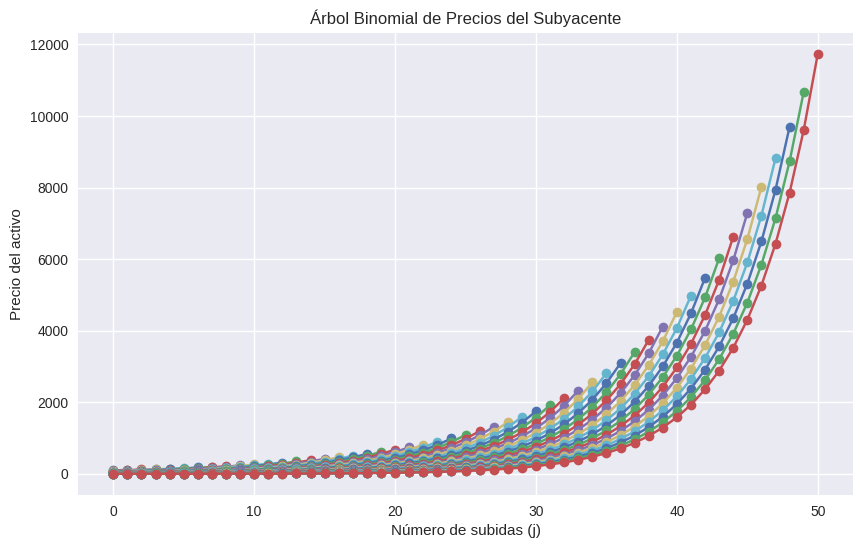

In [5]:

# BINOMIAL OPTION PRICING MODEL

# Autor: Andrés (con guía cuant)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# 1. SETUP DEL PROBLEMA


# Precio actual del subyacente
S0 = 100

# Strike de la opción
K = 100

# Tasa libre de riesgo (anual continua)
r = 0.05

# Tiempo a madurez en años
T = 1

# Número de pasos del árbol binomial
N = 50   # puedes cambiar a 1, 10 o 50 para ver qué pasa

# Factores de subida y bajada
u = 1.10   # Si el precio sube
d = 0.90   # Si el precio baja

# 2. PROBABILIDAD RIESGO-NEUTRAL


"""
En el modelo binomial no usamos probabilidades reales,
sino "riesgo-neutral". Son probabilidades ajustadas para
que el rendimiento esperado del activo sea r (la tasa libre de riesgo).
Esto es clave en pricing moderno porque evita hacer forecasting.
"""

# p es la probabilidad riesgo-neutral de que el precio suba
p = (np.exp(r * T / N) - d) / (u - d)
q = 1 - p

print(f"Probabilidad riesgo-neutral p = {p:.4f}, q = {q:.4f}\n")

# 3. CONSTRUCCIÓN DEL ÁRBOL DE PRECIOS


"""
El árbol binomial genera todos los precios posibles del activo
en N pasos. En cada paso, el precio sube (u) o baja (d).
Ejemplo con N=3:
Paso 0: S0
Paso 1: Su   Sd
Paso 2: S u^2, S u d, S d^2
Paso 3: S u^3, S u^2 d, S u d^2, S d^3

Usamos un arreglo triangular para almacenar los precios.
"""

price_tree = np.zeros((N+1, N+1))

for i in range(N+1):      # i = número de pasos
    for j in range(i+1):  # j = número de subidas
        price_tree[j, i] = S0 * (u**j) * (d**(i-j))

print("Árbol de precios del subyacente:")
print(pd.DataFrame(price_tree), "\n")


# 4. PAYOFFS TERMINALES DE LA OPCIÓN (CALL EUROPEO)


"""
En un call europeo, el valor al final es:
max(S - K, 0)

Aquí calculamos los payoffs en el último nivel del árbol (i = N).
"""

option_tree = np.zeros((N+1, N+1))

for j in range(N+1):
    option_tree[j, N] = max(price_tree[j, N] - K, 0)

print("Payoffs terminales del call europeo:")
print(option_tree[:, N], "\n")


# 5. VALUACIÓN HACIA ATRÁS (BACKWARD INDUCTION)


"""
Aquí ocurre la "magia" del modelo binomial.

En cada nodo anterior, el valor de la opción es:
C = e^{-rΔt} * [ p * C_up + q * C_down ]

Es decir:
- calculamos el valor esperado bajo medida riesgo-neutral
- lo descontamos a valor presente
- repetimos hacia atrás hasta llegar al tiempo 0
"""

dt = T / N  # tamaño del paso de tiempo

for i in range(N-1, -1, -1):        # desde el penúltimo nivel hasta 0
    for j in range(i+1):            # posibles subidas
        Cu = option_tree[j+1, i+1]  # valor si sube
        Cd = option_tree[j,   i+1]  # valor si baja
        option_tree[j, i] = np.exp(-r * dt) * (p * Cu + q * Cd)

print("Árbol de precios de la opción:")
print(pd.DataFrame(option_tree), "\n")

print(f"Valor del Call Europeo hoy: {option_tree[0,0]:.4f}")

# 6. PLOT DEL ÁRBOL DE PRECIOS (BONITO)


plt.figure(figsize=(10, 6))
for i in range(N+1):
    plt.plot(range(i+1), price_tree[:i+1, i], marker="o")
plt.title("Árbol Binomial de Precios del Subyacente")
plt.xlabel("Número de subidas (j)")
plt.ylabel("Precio del activo")
plt.grid(True)
plt.show()
